In [297]:
import geopandas as gpd
import pandas as pd 
import numpy as np

pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

In [298]:
df = pd.read_csv('/Users/dapoadegbile/Documents/Github/Capstone /mtv_viacom_capstone/20_intermediate_files/30_campuses_w_dist_to_nearest_pp.csv', header = 1)
df1 = gpd.read_file('/Users/dapoadegbile/Documents/Github/Capstone /mtv_viacom_capstone/20_intermediate_files/30_campuses_w_dist_to_nearest_pp.geojson', header = 1)

In [299]:
# Re-Label MSI's

df1 = df1.replace({'MSI': {'HBCU': 'HBCU/PBI', 'PBI': 'HBCU/PBI', 'AANAPISI & HSI': 'Other', 
                        'AANAPISI': 'Other', 'ANNH & NASNTI': 'Other', 'ANNH': 'Other',
                        'NASNTI': 'Other', 'HSI & PBI': 'Other', 'TCU': 'Other', 'ANNH & TCU':'Other', ' ': 'PWI',
                        'HSI & NASNTI': 'Other', 'ANNH, HSI & NASNTI': "Other", 'AANAPISI & PBI': 'Other', 'AANAPISI & ANNH': 'Other'}})



In [300]:
accident_states_2016 = ['NY', 'TX', 'CA' 'MO','AR', 'TN', 'UT', 'NV', 'AL', 'WY', 'FL', 'RI' ,'CO' , 'VT' ,'IN',  'KS' , 'MN' , 'SC', 'AZ' ]
accident_states_2012 = ['GA', 'WY', 'TN', 'IN','TX', 'MO', 'MN', 'NY', 'CA']
accident_states_2018 = ['ID', 'VT', 'TX', 'CA', 'NY', 'MO', 'MI', 'OR', 'KS', 'FL', 'IN' , 'TN', 'AZ', 'CO', 'AL', 'NV', 'UT', 'WA', 'WT', 'AS' ]
accident_states = set(accident_states_2016).union(set(accident_states_2012))
df1 = df1[-df1['STATE'].isin(accident_states)]

# removing all of the problem states to keep the same sample across all years

In [301]:
df1.MSI.value_counts()

PWI         1057
Other         79
HBCU/PBI      70
HSI           64
Name: MSI, dtype: int64

In [302]:
# df.groupby('MSI')['distances_2020', 'distances_2020_early'].mean() * 0.000621371

In [303]:
# df[df.MSI == ' '] = 'PWI'
# df[df.MSI == 'HBCU'] = 'HBCU/PBI'
# df[df.MSI == 'PBI'] = 'HBCU/PBI'
# df[~df['MSI'].isin(['PWI', 'HBCU/PBI', 'HSI'])] = 'Other'

df1.MSI.value_counts()




PWI         1057
Other         79
HBCU/PBI      70
HSI           64
Name: MSI, dtype: int64

In [304]:
df1.head()

,UNIQUEID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,TELEPHONE,TYPE,STATUS,POPULATION,COUNTY,COUNTYFIPS,COUNTRY,NAICS_CODE,NAICS_DESC,SOURCE,SOURCEDATE,VAL_METHOD,VAL_DATE,WEBSITE,TOT_ENROLL,TOT_EMP,SHELTERID,preprocessed_name,centroid_x_epsg_102005,centroid_y_epsg_102005,centroid_long,centroid_lat,OPE ID,IPED ID,School Name,Institution Type,# of Nat'l AP Partners,# of Partners,Civic Holiday,MSI,NSLVE,NSLVE\n2014,2016 NSLVE Report,2018 NSLVE Reports,2016 Action Plan,2018 Action Plan,2020 Action Plan,Campus Contact,Longitude,Latitude,Pell Grant %,BIPOC %,American Indian or Alaskan Native,Asian,Black or African American,Hispanic or Latinx,NHPI,Two or more Races,index_right,state_2020,Latitude_2020,Longitude_2020,distances_2020,Latitude_2020_early,Longitude_2020_early,distances_2020_early,Latitude_2012,Longitude_2012,distances_2012,Latitude_2016,Longitude_2016,distances_2016,Latitude_2018,Longitude_2018,distances_2018,Latitude_starbucks,Longitude_starbucks,distances_starbucks,Latitude_target,Longitude_target,distances_target,geometry
0,167312,NORTH SHORE COMMUNITY COLLEGE,1 FERNCROFT RD,Danvers,MA,01923,0840,(978) 762-4350,1,A,6729,ESSEX,25009,USA,611210,JUNIOR COLLEGES,http://www.northshore.edu/about/locations.html,2018-05-30,IMAGERY/OTHER,2020-01-31,www.northshore.edu,5763,966,10812340,northshorecommunitycollege,2.021559e+06,677835.759714,-70.968263,42.590017,2173.00,167312.00,North Shore Community College,"Public, 2 Year",3.0,3.0,1.0,PWI,Yes,None,https://www.northshore.edu/academics/civic-lea...,None,None,http://www.allinchallenge.org/wp-content/uploa...,https://allinchallenge.org/wp-content/uploads/...,None,-70.968044,42.590103,42,40.56%,0.16%,4.04%,10.14%,23.20%,0.14%,2.87%,17375.0,MA,42.582524,-70.931618,2934.337676,42.562567,-70.939541,3662.994173,42.585426,-70.953166,1152.264665,42.585723,-70.984051,1138.920037,42.504856,-70.983499,9329.358466,42.579005,-71.000409,2658.833799,42.552616,-70.937616,4667.018477,"POLYGON ((2021650.66435 678044.50632, 2021714...."
1,164924,BOSTON COLLEGE,140 COMMONWEALTH AVENUE,Chestnut Hill,MA,02467,NOT AVAILABLE,(617) 552-8000,2,A,18898,MIDDLESEX,25017,USA,611310,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",https://www.bc.edu/bc-web/about/maps-and-direc...,2018-05-23,IMAGERY/OTHER,2019-02-05,www.bc.edu,14720,4178,NOT AVAILABLE,bostoncollege,2.013476e+06,646479.837944,-71.166565,42.337867,2128.00,164924.00,Boston College,"Private, 4 Year",2.0,8.0,1.0,PWI,Yes,https://allinchallenge.org/wp-content/uploads/...,https://allinchallenge.org/wp-content/uploads/...,https://allinchallenge.org/wp-content/uploads/...,None,None,https://allinchallenge.org/wp-content/uploads/...,None,-71.169242,42.336213,13,23.53%,0.04%,7.97%,3.88%,8.90%,0.02%,2.72%,17238.0,MA,42.345450,-71.160216,51.551991,42.352893,-71.137603,1778.460127,42.34558,-71.16019,62.438154,42.35341,-71.187882,2182.014184,42.314608,-71.15306,2268.790782,42.348748,-71.159854,343.184635,42.364178,-71.156462,2052.781607,"MULTIPOLYGON (((2013718.60634 646406.05763, 20..."
2,167376,NORTHERN ESSEX COMMUNITY COLLEGE,100 ELLIOTT STREET,Haverhill,MA,01830,2399,(978) 556-3000,1,A,6046,ESSEX,25009,USA,611210,JUNIOR COLLEGES,https://www.necc.mass.edu/directions-maps/,2018-05-30,IMAGERY/OTHER,2019-02-08,www.necc.mass.edu/,5233,813,NOT AVAILABLE,northernessexcommunitycollege,2.009191e+06,698116.510718,-71.046872,42.795902,2174.00,167376.00,Northern Essex Community College,"Public, 2 Year",1.0,1.0,0.0,HSI,Yes,None,None,None,None,None,https://allinchallenge.org/wp-content/uploads/...,None,-71.049040,42.796634,47,47.83%,0.14%,2.22%,4.05%,39.99%,0.26%,1.17%,17531.0,MA,42.796735,-71.049011,0.000000,42.703313,-71.130562,12016.872208,42.796098,-71.047272,0.000000,42.792639,-71.072501,1768.051508,42.792639,-71.072501,1768.051508,42.807206,-71.102071,4296.258598,42.788072,-71.115959,5346.915613,"POLYGON ((2009539.77164 698175.16574, 2009569...."
3,164720,BECKER COLLEGE,61 SEVER ST,Worcester,MA,01609,2165,(877) 523-2537,2,A,2256,WORCESTER,25027,USA,611310,"COLLEGES, UNIVERS

## Average Distance by MSI type

In [305]:
avg_distances = df1.groupby('MSI')['distances_2020_early', 'distances_2020', 'distances_2018', 'distances_2016', 'distances_2012'].mean() * 0.000621371
avg_distances.columns = ['Avg. 2020 Early Distance', 'Avg. 2020 Distance', 'Avg. 2018 Distance', 'Avg. 2016 Distance' , 'Avg. 2012 Distance']
avg_distances


/var/folders/rp/h3y6pfys40903yv4vmq9_2ch0000gn/T/ipykernel_10314/1866168762.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_distances = df1.groupby('MSI')['distances_2020_early', 'distances_2020', 'distances_2018', 'distances_2016', 'distances_2012'].mean() * 0.000621371


,Avg. 2020 Early Distance,Avg. 2020 Distance,Avg. 2018 Distance,Avg. 2016 Distance,Avg. 2012 Distance
MSI,,,,,
HBCU/PBI,1.761150,0.281234,1.787535,0.873787,0.680325
HSI,6.877261,0.439211,4.924997,0.520666,0.268412
Other,11.281968,0.710753,7.723828,1.113510,0.635778
PWI,5.369917,0.510995,5.554294,0.880559,0.508640


# Median Distance by MSI Type

In [306]:
med_distances = df1.groupby('MSI')['distances_2020_early', 'distances_2020', 'distances_2018', 'distances_2016', 'distances_2012'].median() * 0.000621371
med_distances.columns = ['Median 2020 Early Distance', 'Median 2020 Distance', 'Median 2018 Distance', 'Median 2016 Distance' , 'Median 2012 Distance']
med_distances

/var/folders/rp/h3y6pfys40903yv4vmq9_2ch0000gn/T/ipykernel_10314/1644517029.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  med_distances = df1.groupby('MSI')['distances_2020_early', 'distances_2020', 'distances_2018', 'distances_2016', 'distances_2012'].median() * 0.000621371


,Median 2020 Early Distance,Median 2020 Distance,Median 2018 Distance,Median 2016 Distance,Median 2012 Distance
MSI,,,,,
HBCU/PBI,0.870168,0.151486,0.261812,0.278559,0.189300
HSI,1.843854,0.245803,0.369151,0.312425,0.196386
Other,2.063254,0.318278,0.820860,0.322318,0.169945
PWI,1.531490,0.230389,0.431225,0.310216,0.213953


In [307]:
df1.head()

df1[df1.NAME == 'LANCASTER BIBLE COLLEGE']

,UNIQUEID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,TELEPHONE,TYPE,STATUS,POPULATION,COUNTY,COUNTYFIPS,COUNTRY,NAICS_CODE,NAICS_DESC,SOURCE,SOURCEDATE,VAL_METHOD,VAL_DATE,WEBSITE,TOT_ENROLL,TOT_EMP,SHELTERID,preprocessed_name,centroid_x_epsg_102005,centroid_y_epsg_102005,centroid_long,centroid_lat,OPE ID,IPED ID,School Name,Institution Type,# of Nat'l AP Partners,# of Partners,Civic Holiday,MSI,NSLVE,NSLVE\n2014,2016 NSLVE Report,2018 NSLVE Reports,2016 Action Plan,2018 Action Plan,2020 Action Plan,Campus Contact,Longitude,Latitude,Pell Grant %,BIPOC %,American Indian or Alaskan Native,Asian,Black or African American,Hispanic or Latinx,NHPI,Two or more Races,index_right,state_2020,Latitude_2020,Longitude_2020,distances_2020,Latitude_2020_early,Longitude_2020_early,distances_2020_early,Latitude_2012,Longitude_2012,distances_2012,Latitude_2016,Longitude_2016,distances_2016,Latitude_2018,Longitude_2018,distances_2018,Latitude_starbucks,Longitude_starbucks,distances_starbucks,Latitude_target,Longitude_target,distances_target,geometry
2066,213400,LANCASTER BIBLE COLLEGE,901 EDEN RD,Lancaster,PA,17601,5036,(717) 569-7071,2,A,2547,LANCASTER,42071,USA,611310,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",https://www.lbc.edu/Assets/PDFs/About/campus_m...,2018-03-15,IMAGERY/OTHER,2018-03-15,https://www.LBC.edu,2122,425,NOT AVAILABLE,lancasterbiblecollege,1.659450e+06,299457.209826,-76.288134,40.075721,3285.00,213400.00,Lancaster Bible College,"Private, 4 Year",1.0,1.0,0.0,PWI,No,None,None,None,None,None,https://allinchallenge.org/wp-content/uploads/...,None,NaN,NaN,None,37%%,0.00%,1.00%,15.00%,4.00%,0.00%,17.00%,32944.0,PA,40.074333,-76.296332,481.835072,40.040542,-76.307009,3787.355168,40.075905,-76.29901,726.16384,40.004048,-76.249829,8253.315552,40.074391,-76.296559,501.48122,40.06751,-76.306759,1472.061551,40.068111,-76.311442,1830.749669,"MULTIPOLYGON (((1659561.76878 299176.22329, 16..."


In [308]:
df1['BIPOC %'] = (df1['BIPOC %']).str[:-2]
df1['BIPOC %'] = df1['BIPOC %'].astype(float)
df1['BIPOC %']

0       40.5
1       23.5
2       47.8
3       22.4
4       47.2
        ... 
2292    28.5
2293    31.8
2294    23.0
2295    58.0
2296     NaN
Name: BIPOC %, Length: 1270, dtype: float64

In [309]:
df1['BIPOC %'].dtype

dtype('float64')

In [421]:
white = df1[df1['BIPOC %'] < 50 ]
non_white = df1[df1['BIPOC %'] >= 50]

print('# of predominantly white schools: ', len(white))
print('# of predominantly non-white schools: ', len(non_white))

# of predominantly white schools:  1025
# of predominantly non-white schools:  173


In [422]:
print('Average Distance to Polling place location for predominantly white schools: ')
white_distance = white[['distances_2020_early', 'distances_2020', 'distances_2018', 'distances_2016', 'distances_2012']].mean().to_frame()* 0.000621371
white_distance.columns = ['white distance (miles)']
white_distance.head()

Average Distance to Polling place location for predominantly white schools: 


,white distance (miles)
distances_2020_early,5.749820
distances_2020,0.510978
distances_2018,5.767106
distances_2016,0.891521
distances_2012,0.519444


In [423]:

print('Average Distance to Polling place location for predominantly non_white schools: ')
non_white_distance = non_white[['distances_2020_early', 'distances_2020', 'distances_2018', 'distances_2016', 'distances_2012']].mean().to_frame() * 0.000621371
non_white_distance.columns = ['non-white distance (miles)']
non_white_distance.head()

Average Distance to Polling place location for predominantly non_white schools: 


,non-white distance (miles)
distances_2020_early,4.479009
distances_2020,0.482713
distances_2018,3.270266
distances_2016,0.929329
distances_2012,0.517121


In [466]:
data = pd.merge(non_white_distance, white_distance, left_index=True, right_index=True )
data
# data.to_csv('demographic_breakdown.xlsx')

,non-white distance (miles),white distance (miles)
distances_2020_early,4.479009,5.749820
distances_2020,0.482713,0.510978
distances_2018,3.270266,5.767106
distances_2016,0.929329,0.891521
distances_2012,0.517121,0.519444


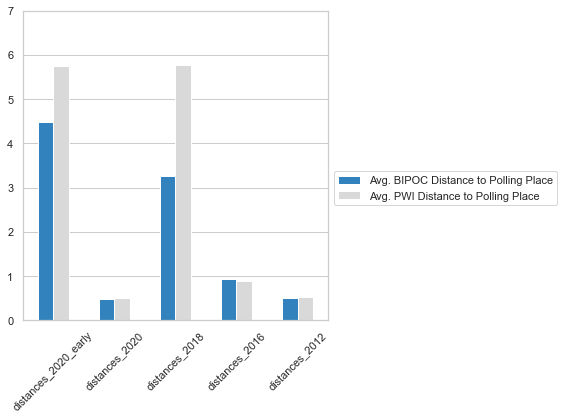

In [425]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

mylabels = ['Avg. BIPOC Distance to Polling Place', 'Avg. PWI Distance to Polling Place']
data.plot.bar(rot=45, colormap = 'tab20c', figsize = (8,6))
# plt.figure(figsize=(5, 5))
plt.grid(axis = 'x')
plt.ylim([0, 7])
plt.legend(bbox_to_anchor =(1, 0.5), labels = mylabels)



In [458]:
# white[(white['distances_2020_early'] == 0) | 
# (white['distances_2020'] == 0) | 
# (white['distances_2018'] == 0) | 
# (white['distances_2016'] == 0) |  
# (white['distances_2012'] == 0)]
cols = ['white/non-white','year','Total Number of Colleges', ' % of colleges with on election day campus voting']
breakdown = [ ('white', 2020 ,len(white['distances_2020'] == 0) , len(white[white['distances_2020'] == 0]) / len(white['distances_2020']) ),
('white', 2018 ,len(white['distances_2018'] == 0) , len(white[white['distances_2018'] == 0]) / len(white['distances_2018']) ),
('white', 2016 ,len(white['distances_2016'] == 0) , len(white[white['distances_2016'] == 0]) / len(white['distances_2016']) ),
('white', 2012 ,len(white['distances_2012'] == 0) , len(white[white['distances_2012'] == 0]) / len(white['distances_2012']) ),


('non-white', 2020 ,len(non_white['distances_2020'] == 0) , len(non_white[non_white['distances_2020'] == 0]) / len(non_white['distances_2020']) ),
('non-white', 2018 ,len(non_white['distances_2018'] == 0) , len(non_white[non_white['distances_2018'] == 0]) / len(non_white['distances_2018']) ),
('non-white', 2016 ,len(non_white['distances_2016'] == 0) , len(non_white[non_white['distances_2016'] == 0]) / len(non_white['distances_2016']) ),
('non-white', 2012 ,len(non_white['distances_2012'] == 0) , len(non_white[non_white['distances_2012'] == 0]) / len(non_white['distances_2012']) ) ] 

data_to_plot = pd.DataFrame(breakdown, columns = cols)


In [459]:
data_to_plot

,white/non-white,year,Total Number of Colleges,% of colleges with on election day campus voting
0,white,2020,1025,0.174634
1,white,2018,1025,0.140488
2,white,2016,1025,0.134634
3,white,2012,1025,0.166829
4,non-white,2020,173,0.144509
5,non-white,2018,173,0.115607
6,non-white,2016,173,0.127168
7,non-white,2012,173,0.156069


In [463]:
data_to_plot.to_csv('racial_breakdown.xlsx')

OSError: [Errno 30] Read-only file system: 'racial_breakdown.xlsx'

In [464]:
df1.columns

Index(['UNIQUEID', 'NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP', 'ZIP4',
       'TELEPHONE', 'TYPE', 'STATUS', 'POPULATION', 'COUNTY', 'COUNTYFIPS',
       'COUNTRY', 'NAICS_CODE', 'NAICS_DESC', 'SOURCE', 'SOURCEDATE',
       'VAL_METHOD', 'VAL_DATE', 'WEBSITE', 'TOT_ENROLL', 'TOT_EMP',
       'SHELTERID', 'preprocessed_name', 'centroid_x_epsg_102005',
       'centroid_y_epsg_102005', 'centroid_long', 'centroid_lat', 'OPE ID',
       'IPED ID', 'School Name', 'Institution Type', '# of Nat'l AP Partners',
       '# of Partners', 'Civic Holiday', 'MSI', 'NSLVE', 'NSLVE\n2014',
       '2016 NSLVE Report', '2018 NSLVE Reports', '2016 Action Plan',
       '2018 Action Plan', '2020 Action Plan', 'Campus Contact', 'Longitude',
       'Latitude', 'Pell Grant %', 'BIPOC %',
       'American Indian or Alaskan Native', 'Asian',
       'Black or African American', 'Hispanic or Latinx', 'NHPI',
       'Two or more Races', 'index_right', 'state_2020', 'Latitude_2020',
       'Longitude_2020', 'distance

In [476]:
print('Null values for 2020 distances:', df1['distances_2020'].isna().sum())

print('Null values for 2018 distances:', df1['distances_2018'].isna().sum())

print('Null values for 2016 distances:', df1['distances_2016'].isna().sum())

print('Null values for 2012 distances:', df1['distances_2012'].isna().sum())



print('Null values for 2020 early distances:', df1['distances_2020_early'].isna().sum())


Null values for 2020 distances: 269
Null values for 2018 distances: 19
Null values for 2016 distances: 193
Null values for 2012 distances: 166
Null values for 2020 early distances: 148
